**Note! This notebook contains interactive maps that can only be viewed by proceeding to https://nbviewer.jupyter.org/ and entering the notebook url.**

# Exploring Countries

For the 124 years that the modern Olympic Games have existed, this marvel has not only been the source of international competition, but importantly, a cornerstone of global collaboration and relationship-building. Bringing together over 200 countries, the Olympics transcend political borders, allowing athletes and spectators of all nationalities to join together in a celebration of athletic talent and ability. Especially in an era characterized by political polarity and turmoil within many major world powers, the collaboration evident within the Olypmic Games holds us together and reminds us of a time more founded on unity around a common goal.

In this section, we will explore the following questions:
- How do we account for countries with multiple NOC codes throughout history?
- Which countries have won the most Olympic medals total?
- Which countries have the highest proportion of athletes winning medals?
- How can we visualize medal data for each country with plotly choropleth maps?
- How has the number of participating countries changed over time?
- How has the number of athletes from our top participating countries changed over time?

To start, we import the necessary packages and upload the cleaned dataframe from our introduction section.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
data = pd.read_csv('cleaned_data.csv')

In [3]:
data.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,2,3,Gunnar Nielsen Aaby,M,24.0,179.0,74.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,3,4,Edgar Lindenau Aabye,M,34.0,179.0,74.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


For this section, we will draw upon the NOC regions tremendously for our visualizations, so we upload and examine this dataframe as well.

In [4]:
country_codes = pd.read_csv('noc_regions.csv')

In [5]:
country_codes.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


For an analysis of the medals won by each country, we create a pivot table that uses the NOC code as the index value and categorizes the number of medals for each NOC by total count of bronze, silver, gold, or none. The first five rows of the new dataframe are displayed below.

In [6]:
medals_per_country = data.pivot_table(index='NOC', values='Name', columns='Medal', aggfunc='count')

In [7]:
medals_per_country.head()

Medal,Bronze,Gold,None,Silver
NOC,,,,
AFG,2.0,NaN,124.0,NaN
AHO,NaN,NaN,78.0,1.0
ALB,NaN,NaN,70.0,NaN
ALG,8.0,5.0,534.0,4.0
AND,NaN,NaN,169.0,NaN


We notice in the first five rows that some null values exist, as those countries had no medals to count for the given category. Below, we fill these null values with 0 instead.

In [8]:
medals_per_country.fillna(0, inplace=True)

To aid with our analysis of medal proportions later, we create two new columns as well, total athletes and total medals.

In [9]:
medals_per_country['Total Athletes'] = medals_per_country.sum(axis=1)
medals_per_country['Total Medals'] = medals_per_country['Bronze']+medals_per_country['Silver']+medals_per_country['Gold']

In [10]:
medals_per_country.head()

Medal,Bronze,Gold,None,Silver,Total Athletes,Total Medals
NOC,,,,,,
AFG,2.0,0.0,124.0,0.0,126.0,2.0
AHO,0.0,0.0,78.0,1.0,79.0,1.0
ALB,0.0,0.0,70.0,0.0,70.0,0.0
ALG,8.0,5.0,534.0,4.0,551.0,17.0
AND,0.0,0.0,169.0,0.0,169.0,0.0


Finally, we create our final dataframe by merging the pivot table with our NOC codes to add a column for the specific region name.

In [11]:
medals_per_country_final = pd.merge(medals_per_country, country_codes, on='NOC')

In [12]:
medals_per_country_final.head()

,NOC,Bronze,Gold,None,Silver,Total Athletes,Total Medals,region,notes
0,AFG,2.0,0.0,124.0,0.0,126.0,2.0,Afghanistan,NaN
1,AHO,0.0,0.0,78.0,1.0,79.0,1.0,Curacao,Netherlands Antilles
2,ALB,0.0,0.0,70.0,0.0,70.0,0.0,Albania,NaN
3,ALG,8.0,5.0,534.0,4.0,551.0,17.0,Algeria,NaN
4,AND,0.0,0.0,169.0,0.0,169.0,0.0,Andorra,NaN


Our notes column is unnecessary for the purposes of this section. We will drop that from our dataframe.

In [13]:
to_drop = ['notes']
medals_per_country_final.drop(to_drop, axis=1, inplace=True)

In [14]:
medals_per_country_final.head()

,NOC,Bronze,Gold,None,Silver,Total Athletes,Total Medals,region
0,AFG,2.0,0.0,124.0,0.0,126.0,2.0,Afghanistan
1,AHO,0.0,0.0,78.0,1.0,79.0,1.0,Curacao
2,ALB,0.0,0.0,70.0,0.0,70.0,0.0,Albania
3,ALG,8.0,5.0,534.0,4.0,551.0,17.0,Algeria
4,AND,0.0,0.0,169.0,0.0,169.0,0.0,Andorra


With our complete dataframe above representing the medals won by country, we are ready to begin our exploratory analysis!

## Accounting for Multiple Country Codes

Below, we conduct a value count for the region column of our dataframe, as some countries have changed based on political events and world wars, leading to multiple country codes for a given region in some cases.

In [15]:
medals_per_country_final.region.value_counts().head(15)

Germany           4
Malaysia          3
Serbia            3
Yemen             3
Russia            3
Czech Republic    3
Greece            2
Canada            2
Australia         2
Vietnam           2
China             2
Syria             2
Trinidad          2
Zimbabwe          2
Boliva            1
Name: region, dtype: int64

Based on our results, we notice that 14 regions have used more than one NOC code to represent themselves in the Olympic Games at some point throughout history. In order to most accurately represent these region's accomplishments in our visualizations below, it is important to synthesize all their results into one row with a single NOC code. Given the small number of countries with this obstacle, we will recode the rows by hand below and drop the original rows for each region.

For example, the region associated with China has used NOC codes "CHN" and "HKG" throughout history for a number of political reasons, but with regards to mapping this data, we will combine these rows into one region under the NOC code CHN.

In [45]:
medals_per_country_final[medals_per_country_final.region=='China']

,NOC,Bronze,Gold,None,Silver,Total Athletes,Total Medals,region
41,CHN,292.0,350.0,4152.0,347.0,5141.0,989.0,China
88,HKG,1.0,1.0,681.0,2.0,685.0,4.0,China


In [46]:
# to_append = pd.DataFrame([['GER', 1260.0, 1301.0, 12127.0, 1195.0, 15883.0, 3756.0, 'Germany']],
#                         columns=['NOC','Bronze','Gold','None','Silver','Total Athletes','Total Medals','region'])
to_append = pd.DataFrame([['GER',1260.0,1301.0,12127.0,1195.0,15883.0,3756,'Germany'],
                          ['YEM', 0.0, 0.0, 48.0, 0.0, 48.0, 0.0, 'Yemen'],
                          ['YUG', 160.0, 157.0, 2757.0, 222.0, 3296.0, 539.0, 'Serbia'],
                          ['TCH', 259.0, 123.0, 5787.0, 262.0, 6431.0, 644.0, 'Czech Republic'],
                          ['RUS', 1178.0, 1599.0, 7745.0, 1170.0, 11692.0, 3947.0, 'Russia'],
                          ['MAS', 5.0, 0.0, 561.0, 11.0, 577.0, 16.0, 'Malaysia'],
                          ['GRE', 84.0, 62.0, 2937.0, 109.0, 3192.0, 255.0, 'Greece'],
                          ['TTO', 22.0, 7.0, 358.0, 8.0, 395.0, 37.0, 'Trinidad'],
                          ['VIE', 0.0, 1.0, 212.0, 3.0, 216.0, 4.0, 'Vietnam'],
                          ['ZIM', 1.0, 17.0, 301.0, 4.0, 323.0, 22.0, 'Zimbabwe'],
                          ['AUS', 522.0, 368.0, 6375.0, 459.0, 7724.0, 1349.0, 'Australia'],
                          ['SYR', 2.0, 1.0, 274.0, 2.0, 279.0, 5.0, 'Syria'],
                          ['CAN', 451.0, 463.0, 8382.0, 438.0, 9734.0, 1352.0, 'Canada'],
                          ['CHN', 293.0, 351.0, 4833.0, 349.0, 5826.0, 993.0, 'China'],
                         ], columns=['NOC','Bronze','Gold','None','Silver','Total Athletes','Total Medals','region'])

The following cell depicts the sum of both rows within the region "China" for each column. Above, we add a list for each country with multiple codes that we be added as a new row to the bottom of our dataframe.

In [47]:
medals_per_country_final[medals_per_country_final.region=='China'].sum()

NOC                   CHNHKG
Bronze                   293
Gold                     351
None                    4833
Silver                   349
Total Athletes          5826
Total Medals             993
region            ChinaChina
dtype: object

In the following cells, we copy the original dataframe, drop the rows for the 14 regions with multiple NOC codes, and finally append the new list of rows.

In [54]:
medals_per_country_map = medals_per_country_final.copy()

In [55]:
to_drop = ['Germany','Yemen','Serbia','Czech Republic','Russia','Malaysia','Greece','Trinidad','Vietnam','Zimbabwe','Australia','Syria','Canada','China']
for country in to_drop:
    medals_per_country_map.drop(medals_per_country_map.index[medals_per_country_map['region'] == country], inplace = True)

In [56]:
medals_per_country_map[medals_per_country_map.region=='Russia']

,NOC,Bronze,Gold,None,Silver,Total Athletes,Total Medals,region


In [57]:
medals_per_country_map = medals_per_country_map.append(to_append,ignore_index=True)

When we view the tail of our dataframe, we see that the rows were added correctly. Success!

In [58]:
medals_per_country_map.tail(15)

,NOC,Bronze,Gold,None,Silver,Total Athletes,Total Medals,region
193,ZAM,1.0,0.0,181.0,1.0,183.0,2.0,Zambia
194,GER,1260.0,1301.0,12127.0,1195.0,15883.0,3756.0,Germany
195,YEM,0.0,0.0,48.0,0.0,48.0,0.0,Yemen
196,YUG,160.0,157.0,2757.0,222.0,3296.0,539.0,Serbia
197,TCH,259.0,123.0,5787.0,262.0,6431.0,644.0,Czech Republic
198,RUS,1178.0,1599.0,7745.0,1170.0,11692.0,3947.0,Russia
199,MAS,5.0,0.0,561.0,11.0,577.0,16.0,Malaysia
200,GRE,84.0,62.0,2937.0,109.0,3192.0,255.0,Greece
201,TTO,22.0,7.0,358.0,8.0,395.0,37.0,Trinidad
202,VIE,0.0,1.0,212.0,3.0,216.0,4.0,Vietnam


In [59]:
medals_per_country_map.region.value_counts().head(15)

Argentina                      1
Malawi                         1
Madagascar                     1
Honduras                       1
Guinea                         1
Saudi Arabia                   1
Saint Lucia                    1
Kuwait                         1
Guinea-Bissau                  1
Turkey                         1
Australia                      1
Mali                           1
Cape Verde                     1
Individual Olympic Athletes    1
Belgium                        1
Name: region, dtype: int64

Above, we can see that there are no longer any regions that have multiple rows for different NOC codes. Now, we can properly proceed will visualizing and mapping our data!

## Which countries have won the most Olympic medals total?

As we've seen in previous sections, the history of the modern Olympics is certainly not equal, with regards to gender, featured sports, and now, in terms of country success. Below, we will evaluate which countries have won the most medals over time across all the modern games. Using the dateframes we already have, we will sort based on the values in the "Total Medals" column and visualize the result as a barplot below.

In [60]:
medals_per_country_final.sort_values('Total Medals',ascending=False,inplace=True)
to_graph = medals_per_country_final.head(50)

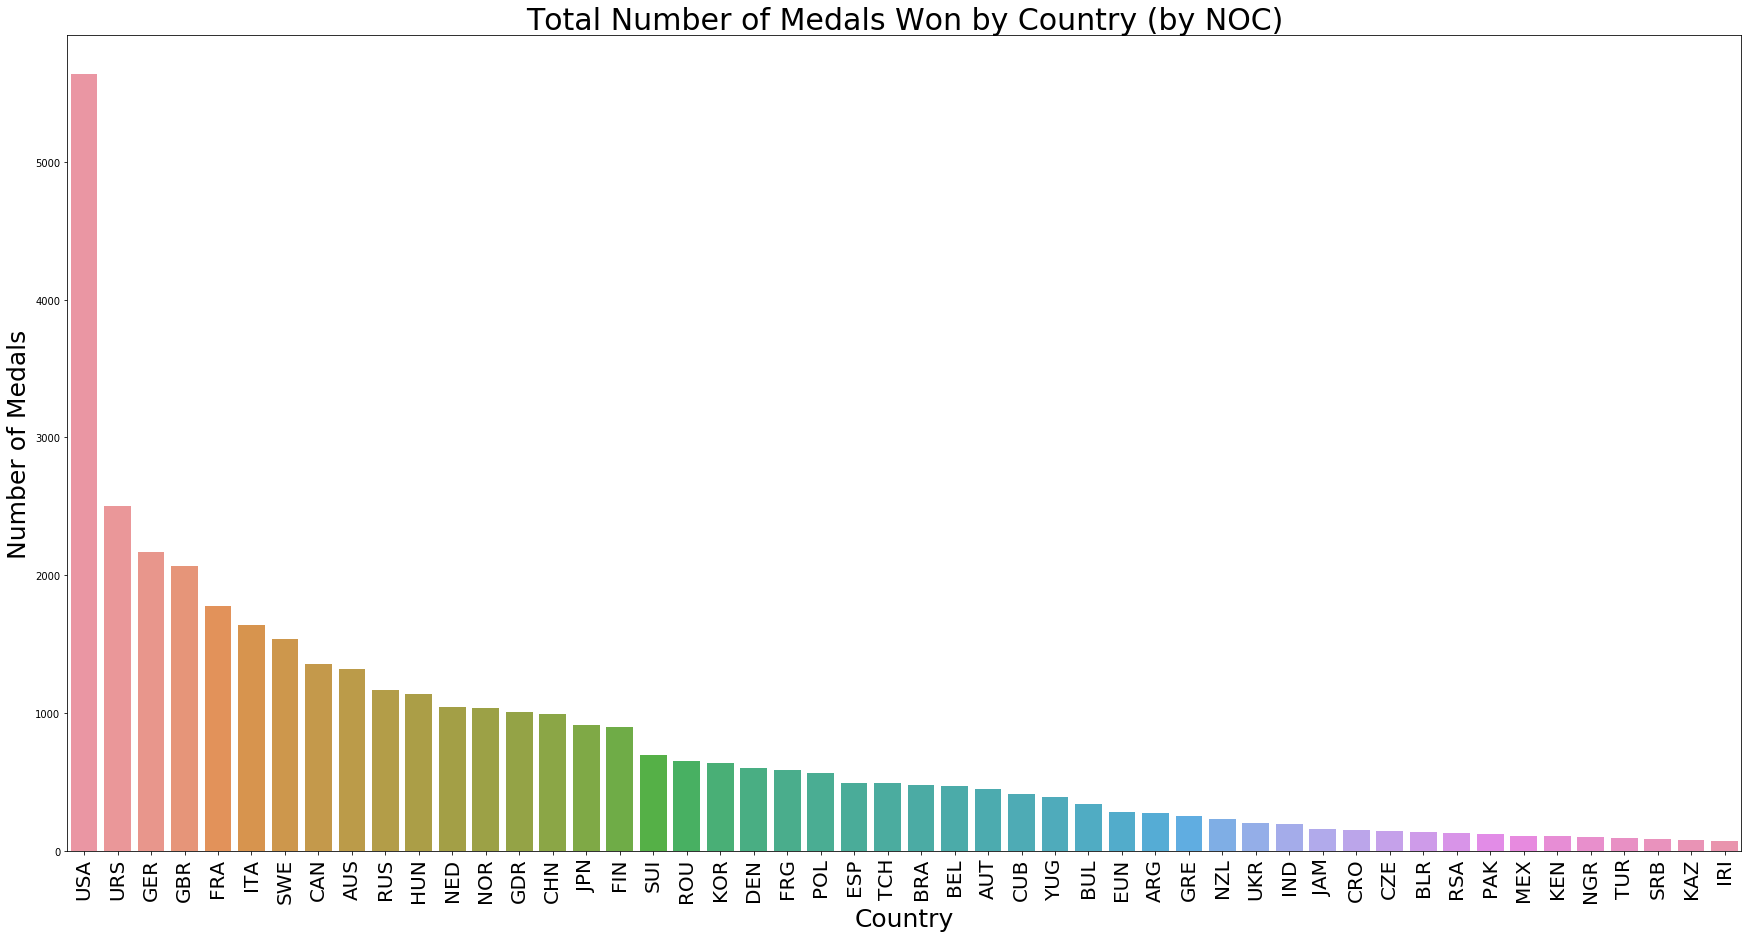

In [62]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(to_graph.head(50)['NOC'],to_graph.head(50)['Total Medals'],ci=False)
plt.xticks(rotation = 90,fontsize=20)
plt.title("Total Number of Medals Won by Country (by NOC)",fontsize=30)
plt.ylabel("Number of Medals",fontsize=25)
plt.xlabel("Country",fontsize=25)
plt.show()

The chart about shows that the USA has far surpassed all other countries with regards to the sheer number of medals won by American athletes over time. With nearly 6000 total medals, the USA easily takes first place, with the Soviet Union in second, but much farther behind with approximately 2500 total medals. After these two frontrunners, Germany, Great Britain, France, Italy, Sweden, Canada, Australia, and Russia take the rest of the top ten spots. However, it is interesting to note that both the Soviet Union and Russia make the top ten list, as they represent nearly identical regions. For the chart above, we used the original dataframe for medals by country, prior to combining rows for regions with multiple NOC codes. Below, we will use the new mapping dataframe (with combined rows) to see if our results are different.

In [63]:
medals_per_country_map.sort_values('Total Medals',ascending=False,inplace=True)
to_graph = medals_per_country_map.head(50)

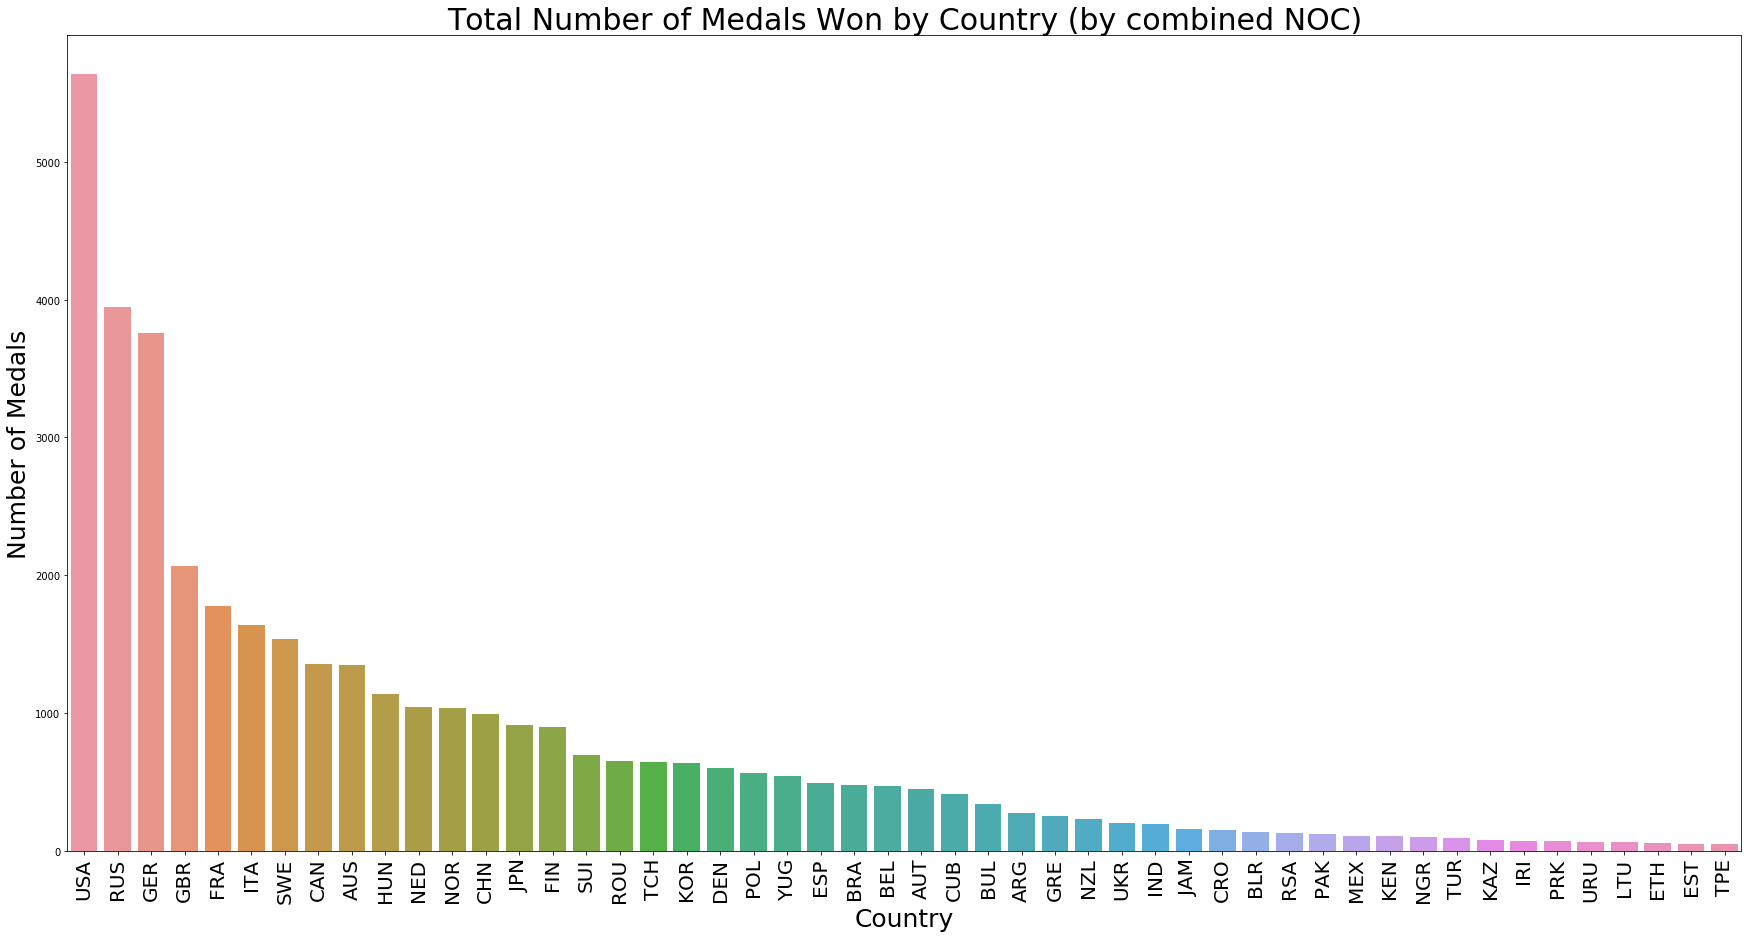

In [65]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(to_graph.head(50)['NOC'],to_graph.head(50)['Total Medals'],ci=False)
plt.xticks(rotation = 90,fontsize=20)
plt.title("Total Number of Medals Won by Country (by combined NOC)",fontsize=30)
plt.ylabel("Number of Medals",fontsize=25)
plt.xlabel("Country",fontsize=25)
plt.show()

The revised chart above shows the USA still in the lead with nearly 6000 total medals, but now Russia and Germany and not nearly as far behind, with almost 4000 total medals each. Following these three frontrunners (unsurprising given their reputation in the 20th century as world superpowers), we have Great Britain, France, Italy, Sweden, Canada, Australia, and Hungary rounding out the top ten. This top list does not differ in order of countries but the values attributed to each demonstrate that the way we classify each region makes a difference, and political/social context is important for understanding each region's specific relationship with the Olympic Games. Additionally, this list is entirely comprised of developed nations with prosperous economies and the wealth to train a large number of professional athletes. Below, we will see how this trend affects the distribution of medals across the world. But first, let's examine the countries with the highest proportion of athletes achieving medals. 

## Which countries have the highest proportion of athletes winning medals?

As noted above, the countries at the top of our first two charts have strong economies that allow them to send high numbers of athletes to the Olympic Games. Thus, with the enormous number of athletes sent from the countries, a high number of medals are likely to be won. On the other hand, countries that are not able to send many athletes to the Olympics have a much lower likelihood of making in onto the list of top 50 countries, with far fewer opportunities to win medals for their country. In the following cells, we will create a new dataframe similar to those that already exist, but with one key difference: the values for each column will be a percentage. Using the values for total number of athletes sent to the Olympic Games, we will calculate the proportion of these that win gold, silver, bronze, or any medal for each country. This wil give us a better understanding of how each country's athletes truly perfrom.

In [66]:
total_olympians_per_country = data.NOC.value_counts()

In [67]:
total_olympians_per_country.head()

USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
Name: NOC, dtype: int64

In [68]:
propor_medals_per_country = medals_per_country_final.copy()

In [69]:
propor_medals_per_country.head()

,NOC,Bronze,Gold,None,Silver,Total Athletes,Total Medals,region
215,USA,1358.0,2638.0,13216.0,1641.0,18853.0,5637.0,USA
213,URS,689.0,1082.0,3182.0,732.0,5685.0,2503.0,Russia
79,GER,746.0,745.0,7665.0,674.0,9830.0,2165.0,Germany
74,GBR,651.0,678.0,10188.0,739.0,12256.0,2068.0,UK
69,FRA,666.0,501.0,10981.0,610.0,12758.0,1777.0,France


Using the copy of our dataframe above, we convert all of the values to percentages in the following cell, dividing the number of medals by the total number of athletes and multiplying this result by 100.

In [70]:
to_propor = ['Bronze','Gold','None','Silver','Total Medals']
for column in to_propor:
    propor_medals_per_country[column] = (100*(propor_medals_per_country[column]/propor_medals_per_country['Total Athletes'])).round(2)

In [71]:
propor_medals_per_country.head()

,NOC,Bronze,Gold,None,Silver,Total Athletes,Total Medals,region
215,USA,7.20,13.99,70.10,8.70,18853.0,29.90,USA
213,URS,12.12,19.03,55.97,12.88,5685.0,44.03,Russia
79,GER,7.59,7.58,77.98,6.86,9830.0,22.02,Germany
74,GBR,5.31,5.53,83.13,6.03,12256.0,16.87,UK
69,FRA,5.22,3.93,86.07,4.78,12758.0,13.93,France


Now that we no longer need it, we will drop the "Total Athletes" column to obtain our final proportional dataframe.

In [72]:
propor_medals_per_country.drop(['Total Athletes'],axis=1,inplace=True)

In [73]:
propor_medals_per_country.head()

,NOC,Bronze,Gold,None,Silver,Total Medals,region
215,USA,7.20,13.99,70.10,8.70,29.90,USA
213,URS,12.12,19.03,55.97,12.88,44.03,Russia
79,GER,7.59,7.58,77.98,6.86,22.02,Germany
74,GBR,5.31,5.53,83.13,6.03,16.87,UK
69,FRA,5.22,3.93,86.07,4.78,13.93,France


Using the proportional dataframe above, we will sort by the "Total Medals" column and visualize the result below.

In [74]:
propor_medals_per_country.sort_values('Total Medals',ascending=False,inplace=True)
to_graph = propor_medals_per_country.head(50)

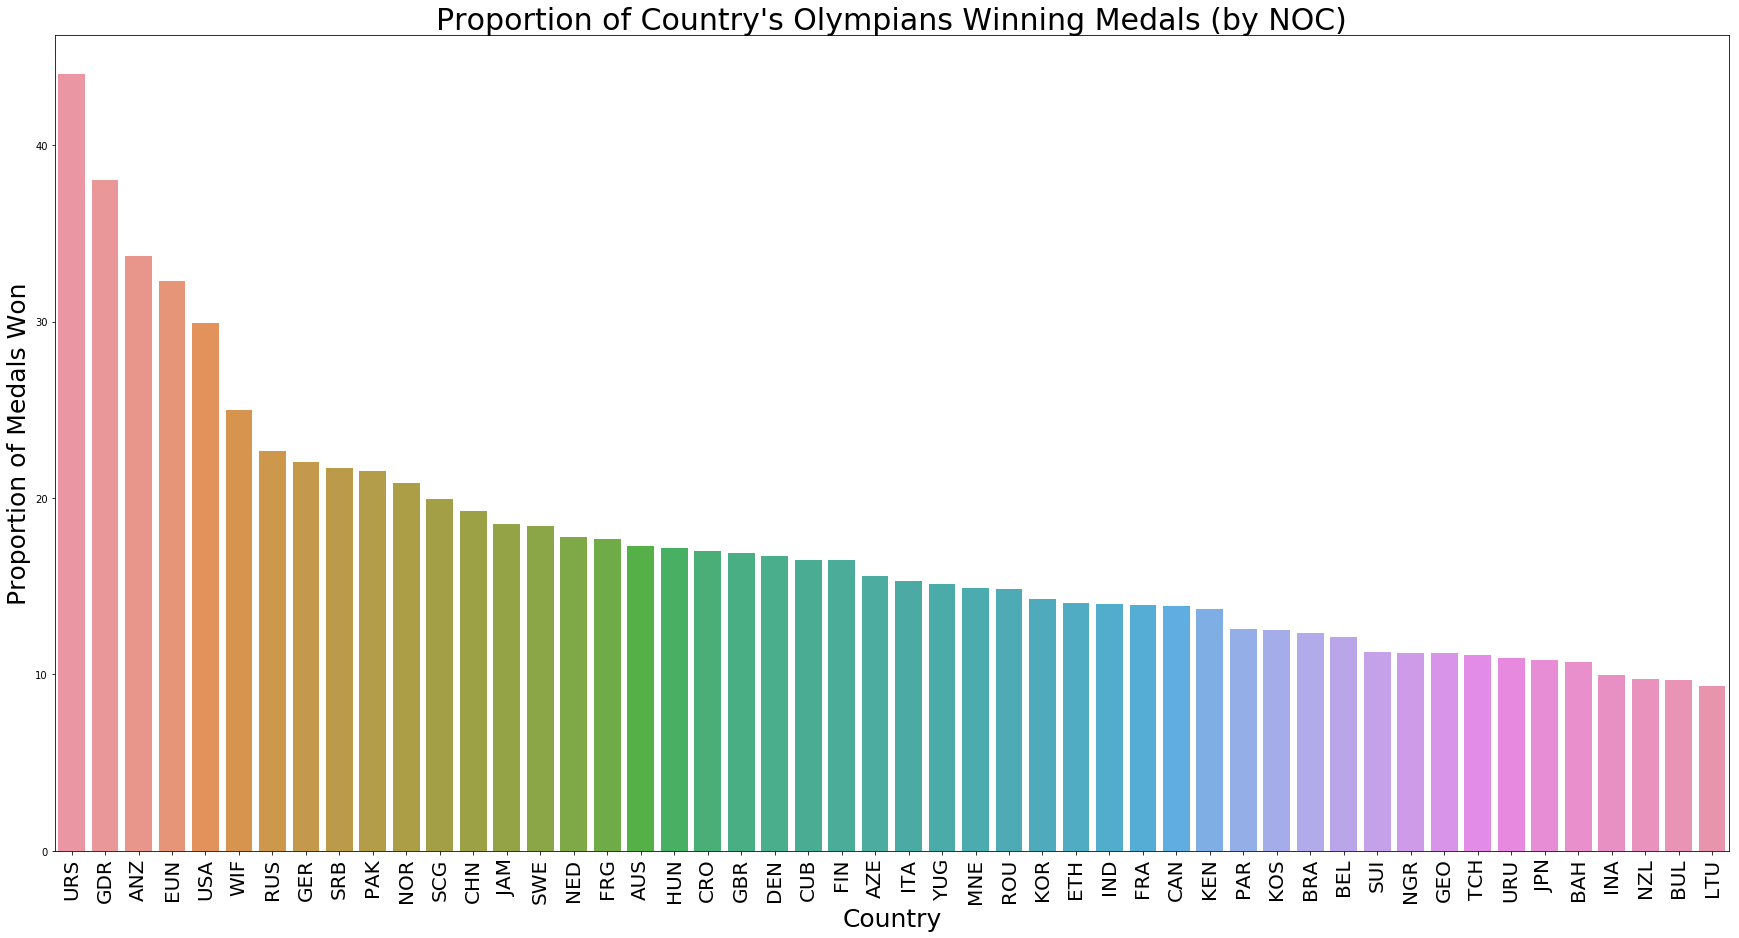

In [75]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(to_graph.head(50)['NOC'],to_graph.head(50)['Total Medals'],ci=False)
plt.xticks(rotation = 90,fontsize=20)
plt.title("Proportion of Country's Olympians Winning Medals (by NOC)",fontsize=30)
plt.ylabel("Proportion of Medals Won",fontsize=25)
plt.xlabel("Country",fontsize=25)
plt.show()

In [77]:
propor_medals_per_country.head(10)

,NOC,Bronze,Gold,None,Silver,Total Medals,region
213,URS,12.12,19.03,55.97,12.88,44.03,Russia
76,GDR,10.62,15.01,62.00,12.36,38.00,Germany
7,ANZ,5.81,23.26,66.28,4.65,33.72,Australia
66,EUN,9.38,14.70,67.71,8.22,32.29,Russia
215,USA,7.20,13.99,70.10,8.70,29.90,USA
222,WIF,25.00,0.00,75.00,0.00,25.00,Trinidad
171,RUS,7.93,7.58,77.35,7.14,22.65,Russia
79,GER,7.59,7.58,77.98,6.86,22.02,Germany
184,SRB,10.46,3.83,78.32,7.40,21.68,Serbia
154,PAK,6.05,7.47,78.47,8.01,21.53,Pakistan


When we evaluate countries by the proportion of their athletes that win medals, our results change signficantly. Now, the USA falls to fifth place, preceded by the Soviet Union, East Germany, Australasia (Australia and New Zealand combined), and Russia 1992 (ex-republics of the Soviet Union). After the US, the other countries in the top ten are Trinidad, Russia, Germany, Serbia, and Pakistan. Differing from our first two charts above, we start to see some countries that may not have sent as many athletes to the Olympic Games, but whose athletes may have been more successful in terms of the proportion winning medals. However, we still see some overlap with multiple Russian and German NOC codes in the top ten.

Because the plot above uses the original dataframe prior to combining regions with multiple NOC codes, we will duplicate the process below for our modified mapping dataframe. Then we wil replot the proportion of medals won by country to see if our results differ.

In [78]:
propor_map = medals_per_country_map.copy()

In [79]:
to_propor = ['Bronze','Gold','None','Silver','Total Medals']
for column in to_propor:
    propor_map[column] = (100*(propor_map[column]/propor_map['Total Athletes'])).round(2)

In [80]:
propor_map.drop(['Total Athletes'],axis=1,inplace=True)

In [81]:
propor_map.sort_values('Total Medals',ascending=False,inplace=True)
to_graph = propor_map.head(50)

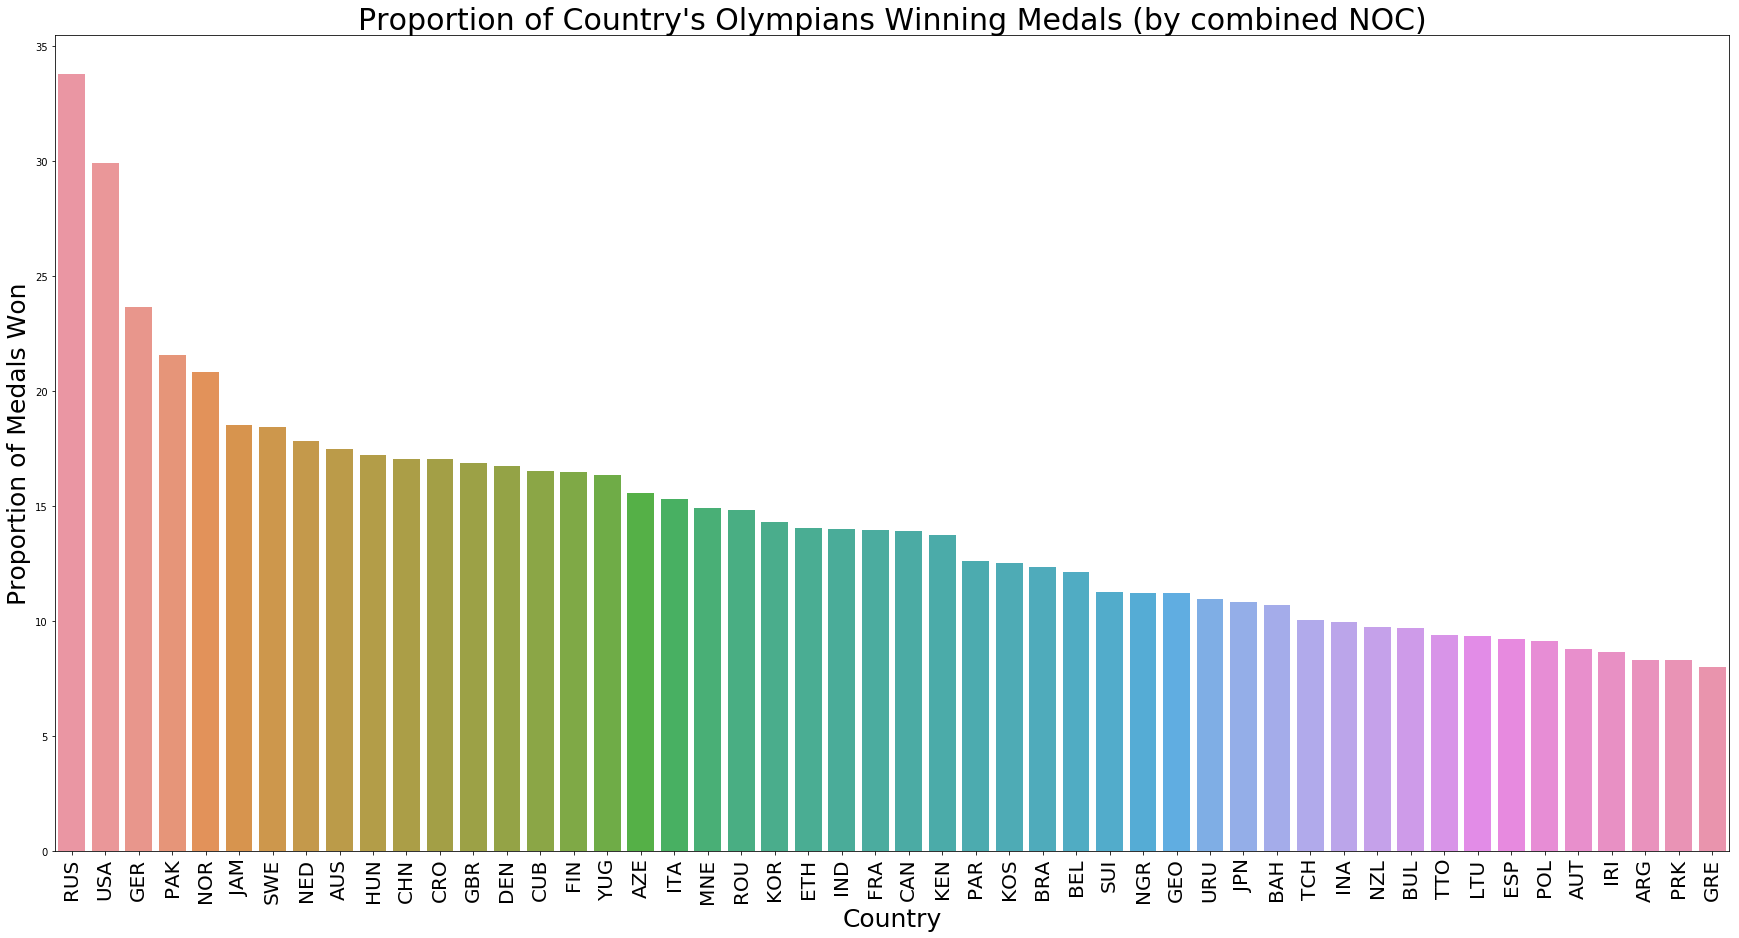

In [83]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(to_graph.head(50)['NOC'],to_graph.head(50)['Total Medals'],ci=False)
plt.xticks(rotation = 90,fontsize=20)
plt.title("Proportion of Country's Olympians Winning Medals (by combined NOC)",fontsize=30)
plt.ylabel("Proportion of Medals Won",fontsize=25)
plt.xlabel("Country",fontsize=25)
plt.show()

Our final chart illustrating medals won by country most accurate depicts a country's performance at the Olympic Games, with medal count normalized by proportion and regions with multiple NOC codes accounted for. Russia still sits at the top of our list, but now the US takes second place, followed by Germany, Pakistan, Norway, Jamaica, Sweden, the Netherlands, Australia, and Hungary. Some of same countries appear here as in our original plot for total medal count, but now we see some less developed nations making appearances, demonstrating that we can't simply take the total medal count at face value as an indication of country success at the Olympics. Below, we will answer the same questions about medal success per country, but instead by visualizing the results through plotly choropleth maps to better understand the geographic distribution. Let's check it out!

In [85]:
propor_map.head(15)

,NOC,Bronze,Gold,None,Silver,Total Medals,region
198,RUS,10.08,13.68,66.24,10.01,33.76,Russia
188,USA,7.20,13.99,70.10,8.70,29.90,USA
194,GER,7.93,8.19,76.35,7.52,23.65,Germany
137,PAK,6.05,7.47,78.47,8.01,21.53,Pakistan
133,NOR,5.93,7.62,79.17,7.28,20.83,Norway
89,JAM,5.19,4.48,81.49,8.84,18.51,Jamaica
170,SWE,6.42,5.74,81.58,6.26,18.42,Sweden
129,NED,7.07,4.92,82.19,5.82,17.81,Netherlands
204,AUS,6.76,4.76,82.53,5.94,17.47,Australia
77,HUN,5.62,6.54,82.82,5.02,17.18,Hungary


# Plotly Choropleth Maps


For our first few maps, we will develop a method that better enables us to create maps quickly, simply using the dataset, specific criteria that we will use to differentiate countries, and the colorscale that will represent this data. We will start by using the dataset with total medal count for each country, prior to normalization via proportion.

### Total Medal Count

In [86]:
medals_per_country_map.head()

,NOC,Bronze,Gold,None,Silver,Total Athletes,Total Medals,region
188,USA,1358.0,2638.0,13216.0,1641.0,18853.0,5637.0,USA
198,RUS,1178.0,1599.0,7745.0,1170.0,11692.0,3947.0,Russia
194,GER,1260.0,1301.0,12127.0,1195.0,15883.0,3756.0,Germany
65,GBR,651.0,678.0,10188.0,739.0,12256.0,2068.0,UK
61,FRA,666.0,501.0,10981.0,610.0,12758.0,1777.0,France


In [89]:
medals_per_country_map.columns = ['NOC','Bronze Medals','Gold Medals','None','Silver Medals','Total Athletes','Total Medals','region']

The method below will be used in all the maps below. Using plotly, with will create a choropleth map that specifies the location based on the region column of our dataframe, locationmode in plotly to be the country names (reflective of the regions in our dataframe), the 'z' data as the criteria we would like to represent, and the colorscale that reflects the range of this data.

In [90]:
def create_map(data, criteria, colorscale):
    trace = go.Choropleth(
            locations = data['region'],
            locationmode='country names',
            z = data[criteria],
            text = data['region'],
            autocolorscale =False,
            reversescale = False,
            colorscale = colorscale,
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Total Medals',
                tickprefix = '')
        )

    data = [trace]
    layout = go.Layout(title = '{} Won by Country Over All Olympic Competitions'.format(criteria),
                       geo = dict(
                           showframe = True,
                           showlakes = False,
                           showcoastlines = True,
                           projection = dict(
                               type = 'natural earth'
                           )
                       )
                      )

    fig = dict( data=data, layout=layout )
    iplot(fig)

**In order to see the interactive maps below, please proceed to https://nbviewer.jupyter.org/ and enter the url for this notebook!**

In [105]:
create_map(medals_per_country_map, 'Total Medals', 'emrld')

As with our first two charts from above, we can clearly see that the USA dominates the total medal count overtime, with the darkest shade of green on the map. Russia and Germany follow in second with a lighter shade than the USA, but stand out as darker than all other countries. With a lighter minty color, we see Australia, China, Canada, Japan, and many Western European countries. Finally, nearly all of Africa, South America, Eastern Europe, and the Middle East possess the dullest shade of green, with very few total medals in comparison to the aforementioned countries. The distribution between developed and developing nations is stark, and demonstrates - as we've seen in many cases before - how the Olympic Games represent and reflect many socioeconomic, political, and social issues across our world. Below, we will explore the distribution of gold, silver, and bronze medals more specifically, although I expect we will see similar trends as evidenced above.

In [94]:
create_map(medals_per_country_map, 'Gold Medals', 'YlOrBr')

*Very* similar trends to those in our first map. The United States, Russia, and Germany lead the gold medal total count, with the same countries (Australia, China, Canada, many Western European countries) claiming the rest of the top spots. Separation between developed and developing nations remains clear.

In [95]:
create_map(medals_per_country_map, 'Silver Medals', 'Greys')

See above for trends. Nothing different here for the silver medal count.

In [96]:
create_map(medals_per_country_map, 'Bronze Medals', 'Reds')

Here, with the total bronze medal count, we start to see a rise in some countries that were clearly out of the running before. Specifically, Brazil, Ukraine, and Romania have bronze medal counts more comparable to some of our top countries than before. Still, however, the majority of Africa, South American, and Middle Eastern nations remain extremely low in their medal count. Now, let's explore the dataframe normalized by proportion of athletes to see if these trends shift in any significant way.

### Proportion of Athletes Winning Medals by Country

As we explained above, nations such as the USA and Russia, as world superpowers and economic giants, can afford to train a much higher number of athletes for the Olympic Games than many developing nations. Thus, by normalizing the data based on the proportion of each country's athletes that have obtained medals, we can gather a better understanding of how successful each nation has been in the Olympics. Let's explore this data via plotly choropleth maps below!

In [106]:
propor_map.head()

,NOC,Bronze,Gold,None,Silver,Total Medals,region
198,RUS,10.08,13.68,66.24,10.01,33.76,Russia
188,USA,7.20,13.99,70.10,8.70,29.90,USA
194,GER,7.93,8.19,76.35,7.52,23.65,Germany
137,PAK,6.05,7.47,78.47,8.01,21.53,Pakistan
133,NOR,5.93,7.62,79.17,7.28,20.83,Norway


In [108]:
propor_map.columns = ['NOC','Bronze Medals','Gold Medals','None','Silver Medals','Total Medals','region']

**In order to see the interactive maps below, please proceed to https://nbviewer.jupyter.org/ and enter the url for this notebook!**

In [107]:
create_map(propor_map, 'Total Medals', 'emrld')

Wow! This map of total medal proportion per country looks substantially different than our original map for total medal count. We still see the United States, Russia, and Germany in the top three places (their dominance is truly unparalleled), but their lead is far less substantial than before. Now, we see Pakistan, Norway, Jamaica, and Sweden only approximately 10 percentage points behind our frontrunners. More remarkably, now we see that the distinction between developed and developing nations is not nearly as stark. South America, Africa, and the Middle East show a range of shades, indicating that many have achieved medal proportions more comparable with our previous leaders, some even surpassing many of our prior frontrunners. Notable nations include Brazil (12.34%), Paraguay (12.59%), Cuba (16.5%), Ethiopia (14.02%), Kenya (13.73%), Nigeria (11.22%), and South Korea (14.29%). Below, we'll again explore the breakdown of gold, silver, and bronze medals as well.

In [109]:
create_map(propor_map, 'Gold Medals', 'YlOrBr')

Again, we see a much more interesting distribution of gold medals here than in our total count from before! As benchmarks, our frontrunners Russia and the United States have 13.68% and 13.99% (respectively) of their athletes achieving gold medals. Notable changes include rises in the following countries: Uruguay (5.38%), Cuba (6.62%), Cameroon (6.41%), India (9.8%), Zimbabwe (5.26%), Ethiopia (5.82%), Kenya (4.4%), Pakistan (7.47%), and South Korea (4.95%).

In [110]:
create_map(propor_map, 'Silver Medals', 'Greys')

Uruguay takes the top spot with 12.29%! Although Russia and the United States follow with 10.01% and 8.7%, respectively, this is the first time that one of them does not easily occupy first place.

In [111]:
create_map(propor_map, 'Bronze Medals', 'Reds')

Although Russia reoccupies the top spot with 10.08% of athletes receiving bronze medals, the color is much more evenly distributed across the globe here than in previous maps. However, as with the other maps with normalized data, we still see the many African and Central/South American nations have very low percentages of medalists. While our proportional dataframe allows us to more effectively evaluate nations in terms of overall athlete success, it still appears that a dichotomy exists between athletes in developed and developing nations. Moving forward, it may behoove the International Olympic Committee to make policy decisions about the games that reduce the effect of socioeconomic differences in countries' performances at the games, possibility through the introduction of different classes based on country size, number of athletes, or another factor that will give all nations a more equitable chance of demonstrating their success, ability, power, and position within the world.

## How many countries have participated in each year of the Olympics?

As mentioned in the introduction to this section, over 200 different NOC codes are currently used, based on the number of countries and independent regions that now attend the Olympic Games each year. However, this was not always true, as the modern Olympics started off as a much smaller event than it is today. The number of nations has certainly grown over time. Below, we will explore how the number of participating countries, based on the number of NOC codes used, has changed throughout the past 124 years.

In order to explore this question, we'll create a new dataframe by grouping our original data by year and finding the number of unique NOC values for each. 

In [31]:
countries_per_year = pd.DataFrame(data.groupby(['Year'])['NOC'].nunique())

In [33]:
countries_per_year.head()

,NOC
Year,
1896,12
1900,31
1904,15
1906,21
1908,22


In [35]:
countries_per_year.reset_index(inplace=True)

Below, we will plot our new dataframe as a pointplot of number of countries by year.

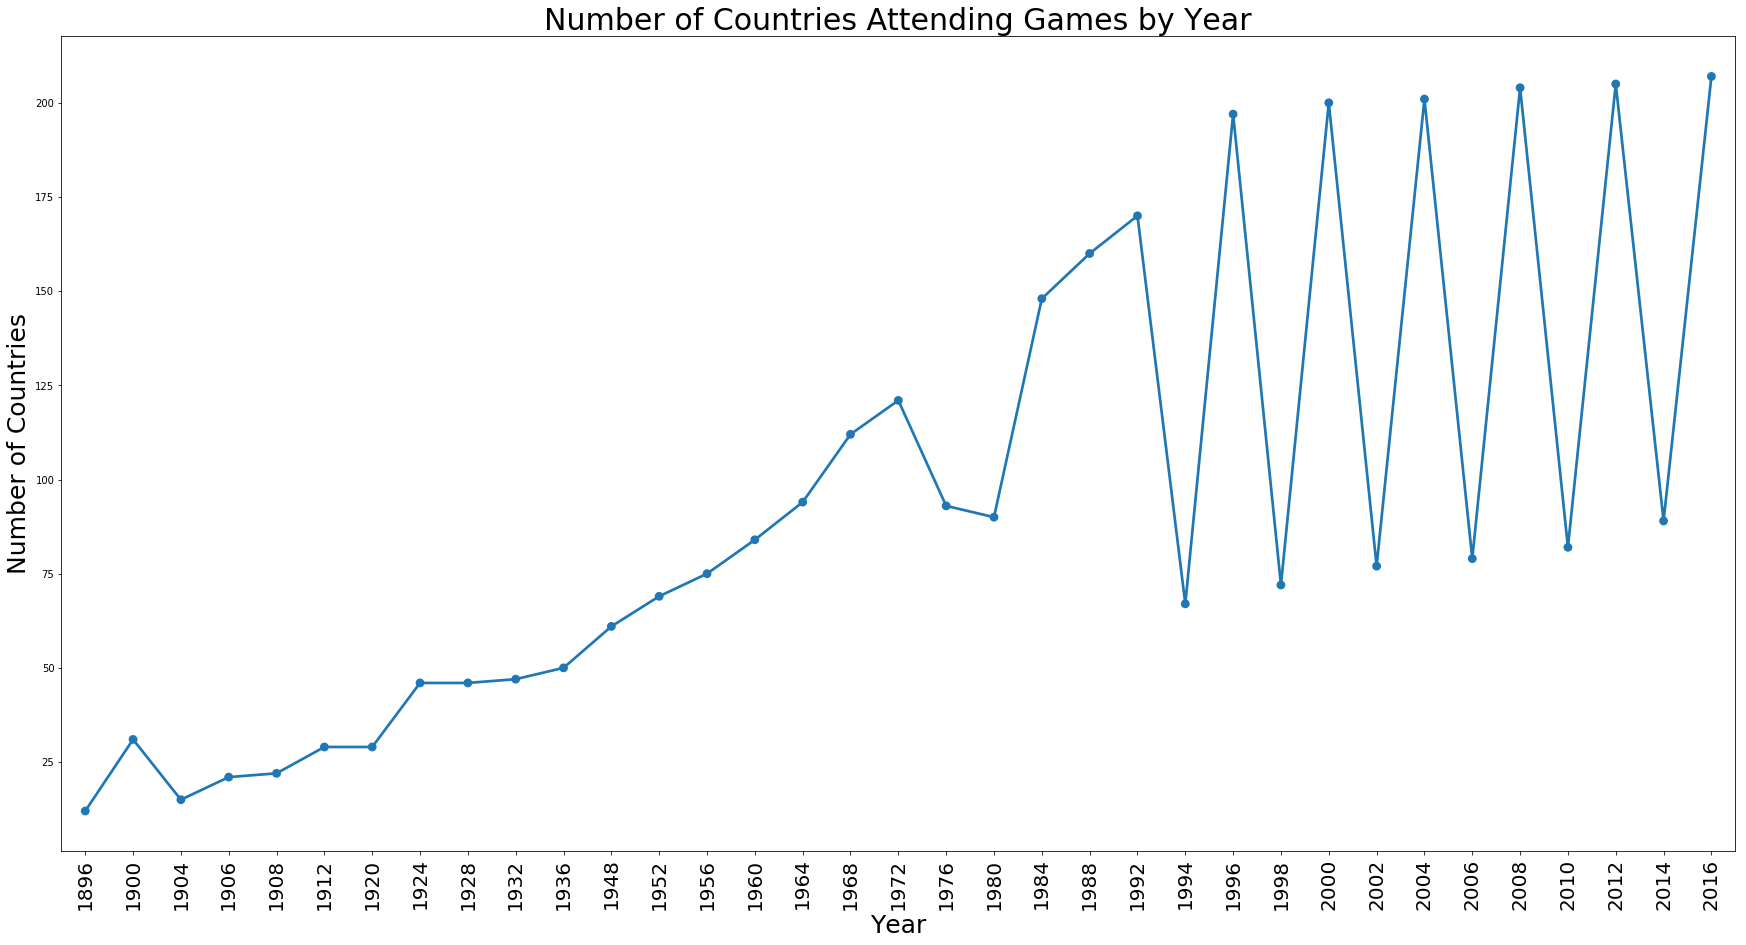

In [36]:
plt.figure(figsize=(30, 15))
sns.pointplot('Year', 'NOC', data=countries_per_year)
plt.title('Number of Countries Attending Games by Year',size=30)
plt.xlabel('Year',size=25)
plt.ylabel('Number of Countries',size=25)
plt.xticks(rotation=90,size=20)
plt.show()

In the chart above, we see that the number of countries (based on NOC code) in the early games was relatively low. The number stayed below 50 until 1924, although there appeared to be a uncharacteristic increase in 1904 during the Paris Summer Games. From 1950 until 1972, the number continued to steadily rise, reaching approximately 125 before a dramatic drop in attendance at both the 1976 and 1980 games. Due to an unauthorized New Zealand rugby tour through South Africa after the IOC called for a sports embargo in the Africa nation following an anti-apartheid protest massacre, 29 African nations boycotted the 1976 games, leading to the first reduction in country participation that we see above. As a consequence of the Cold War and tensions between the United States and the Soviet Union, the US called for a boycott of the 1980 Summer Olympics in the Soviet Union in response to the Soviet invasion of Afghanistan. Sixty-five nations did not participate in the games that year, leading to the lowest number of participating nations since 1960. Although the Soviet Union called for a boycott in the following games in 1984 in Los Angeles, only 15 nations joined with them in foregoing the games, we see the number begin to rise again from there on out. However, starting in 1992 with the separation of summer and winter games, we see an oscillatory pattern every other year, as far fewer nations participate in the Winter Olympic games. Despite this difference in participation between the summer and winter games, we see that both appear to be increasing in number each year. Below, we will separately graph the summer and winter games participation to more easily observe this trend.

In [37]:
summer_data = data[data.Season=='Summer']

In [38]:
winter_data = data[data.Season=='Winter']

In [39]:
scountries_per_year = pd.DataFrame(summer_data.groupby(['Year'])['NOC'].nunique())
wcountries_per_year = pd.DataFrame(winter_data.groupby(['Year'])['NOC'].nunique())

In [40]:
scountries_per_year.reset_index(inplace=True)
wcountries_per_year.reset_index(inplace=True)

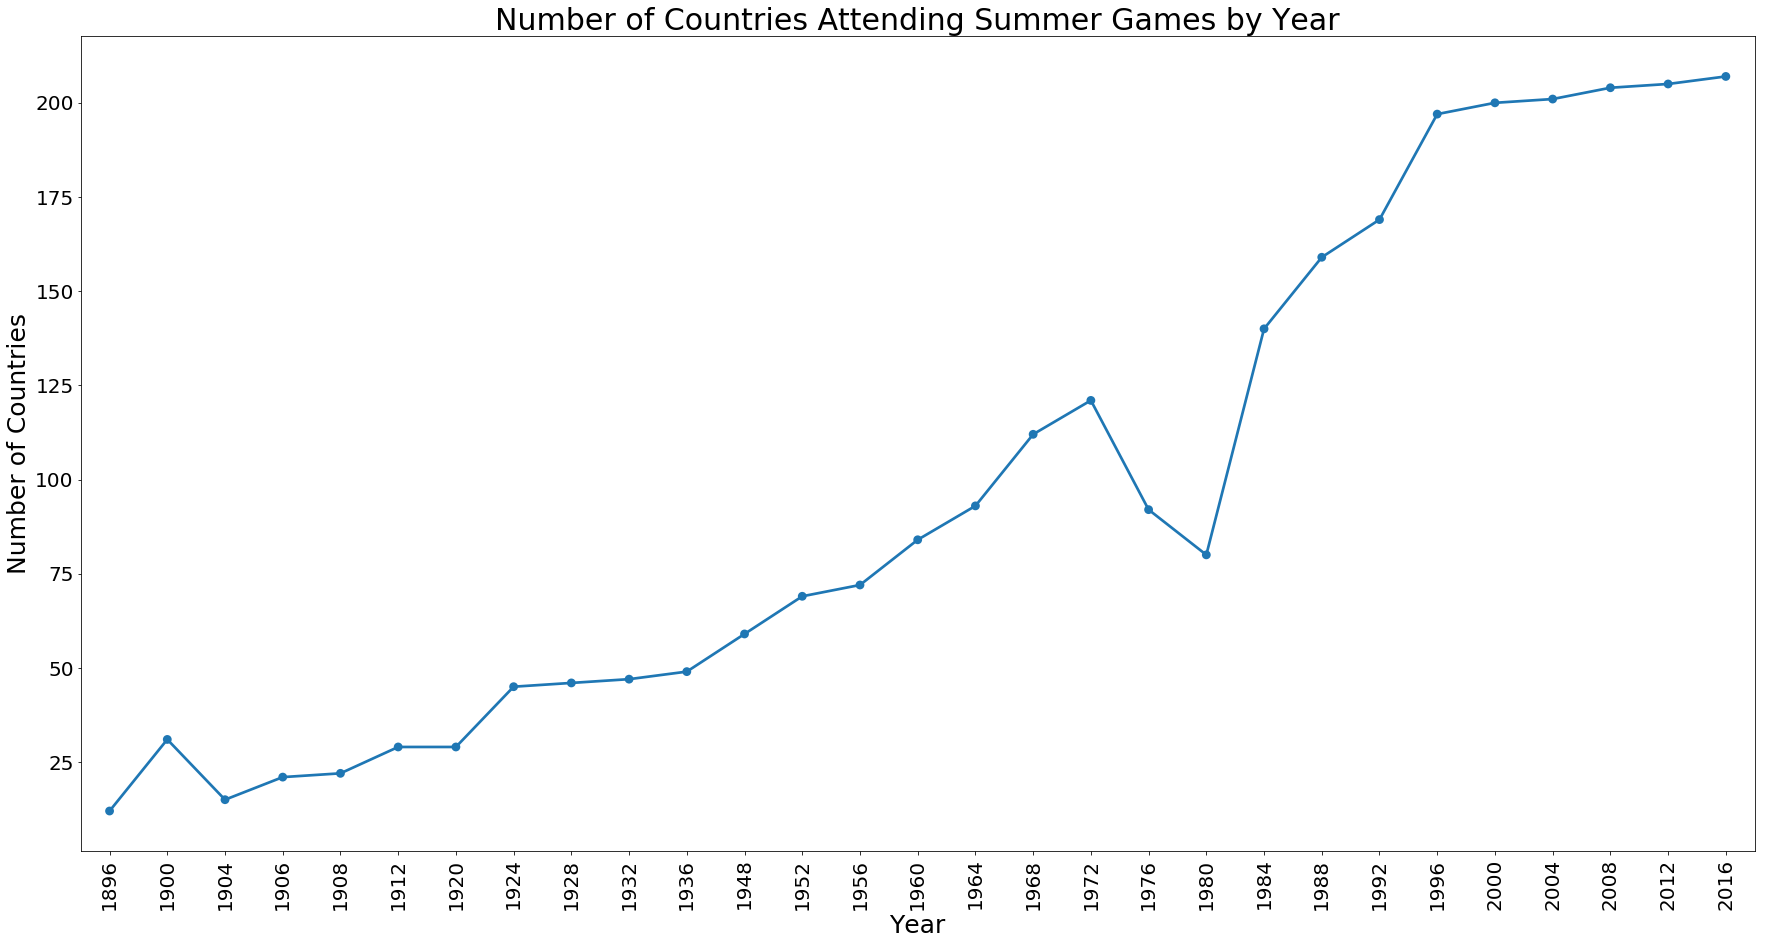

In [44]:
plt.figure(figsize=(30, 15))
sns.pointplot('Year', 'NOC', data=scountries_per_year)
plt.title('Number of Countries Attending Summer Games by Year',size=30)
plt.xlabel('Year',size=25)
plt.ylabel('Number of Countries',size=25)
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)
plt.show()

Besides the aforementioned political causes of the atypical rises and drops in participation throughout modern Olympic history, the number of participating nations in the summer Olympic Games has increase steadily over time, rising from just 12 nations in 1986 to over 200 in 2016.

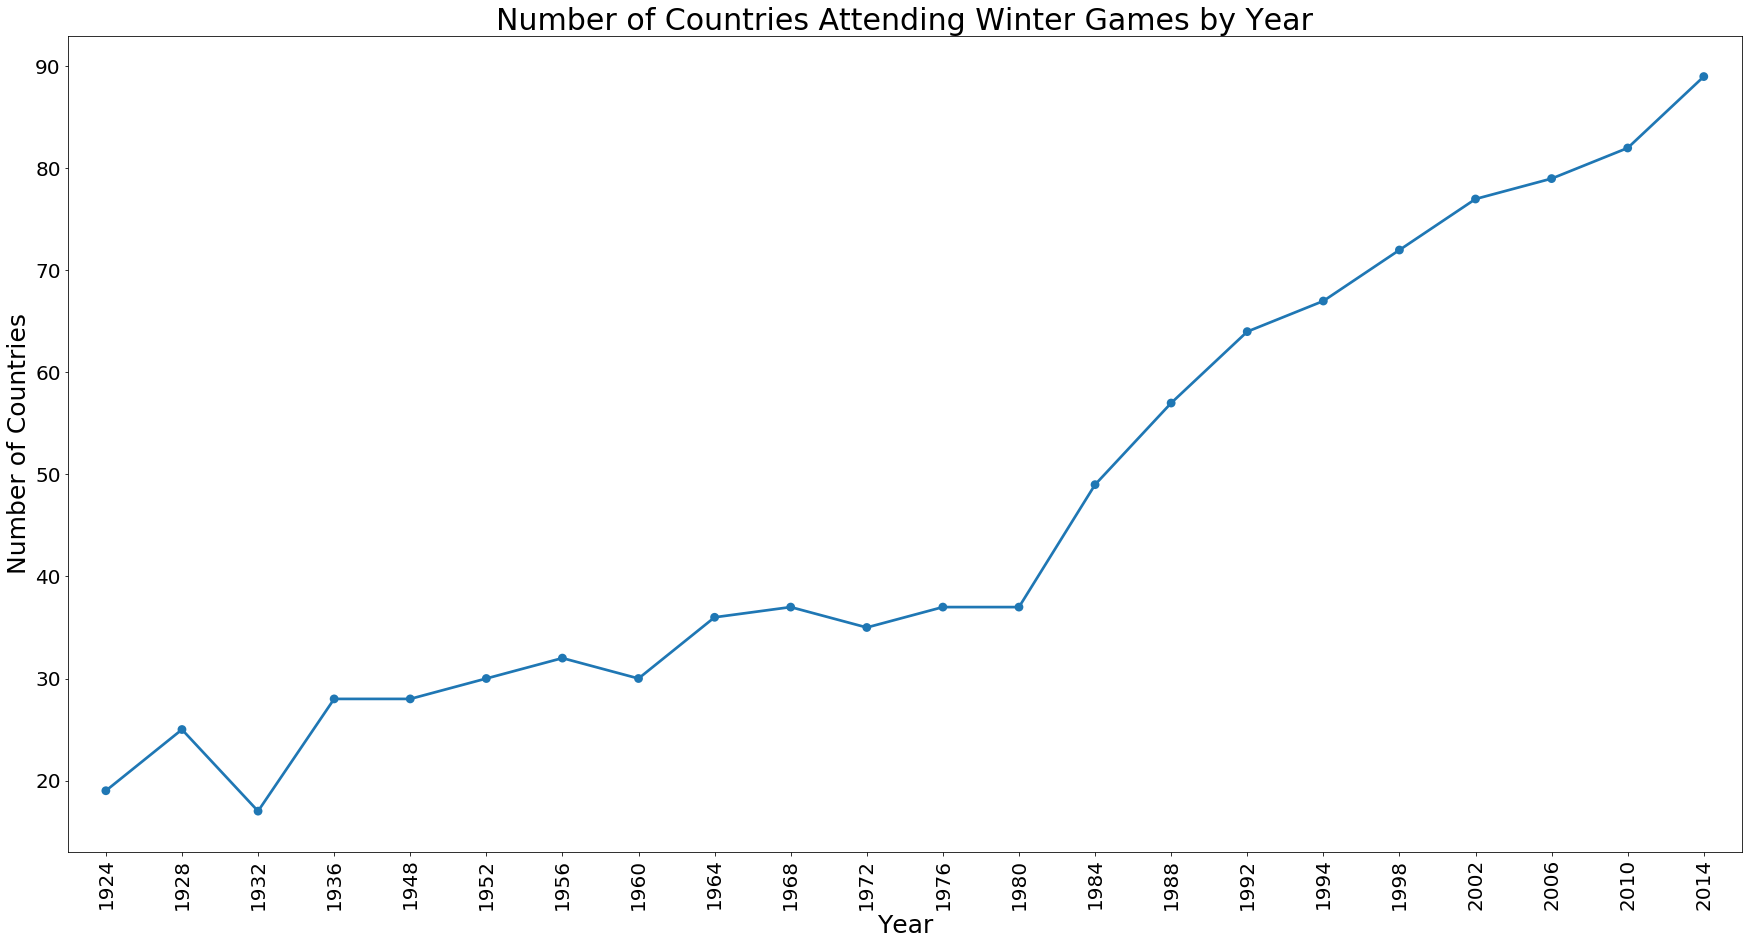

In [43]:
plt.figure(figsize=(30, 15))
sns.pointplot('Year', 'NOC', data=wcountries_per_year)
plt.title('Number of Countries Attending Winter Games by Year',size=30)
plt.xlabel('Year',size=25)
plt.ylabel('Number of Countries',size=25)
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)
plt.show()

With the winter Olympic Games starting in 1924, we see a steady rise from just 19 participating nations to 37 in 1980, before these games truly took off, increasing by about 10 nations each decade, until reaching it's peak in 2014 with almost 90 total nations at the games. Although less popular than its summer counterpart, the winter games has risen in popularity since its origin and likely will continue to do so, especially as many nations less suitable for winter training find creative methods of joining the competition (i.e. Cool Runnings and the Jamaican bobsled team).

## How has the number of athletes from our top participating countries changed over time?

As we saw in our previous question, the number of participating nations has certainly changed over time, but what about the size of the games, and more specifically, the number of athletes from each country? Below, we will explore how the number of athletes has changed over time in our top fifteen participating nations (measured by the overall number of athletes each country has sent throughout modern Olympic history).

To get started with this question, we will merge our original data with the country codes.

In [126]:
top_participants = pd.merge(data, country_codes, on='NOC')

Below, we can see the top fifteen countries with regards to number of athletes over time.

In [127]:
top_participants.region.value_counts()[:15]

USA               18853
Germany           15883
France            12758
UK                12256
Russia            11692
Italy             10715
Canada             9734
Japan              8444
Sweden             8339
Australia          7724
Hungary            6607
Czech Republic     6431
Poland             6207
Switzerland        6150
Netherlands        5839
Name: region, dtype: int64

Let's revise our merged dataframe to include only results from those nations in the list above.

In [128]:
top_participants = top_participants[top_participants.region.isin(
    ['USA','Germany','France','UK','Russia','Italy','Canada','Japan','Sweden',
    'Australia','Hungary','Czech Republic','Poland','Switzerland','Netherlands'])]

Finally, we'll group these results by year and region to obtain a count for each country by Olympic year, and reset the index to prepare for visualization.

In [129]:
top_participants = top_participants.groupby(['Year','region']).count()

In [131]:
top_participants.reset_index(inplace=True)

Below, we code a heatmap for athlete participation overtime by creating a pivot table from our dataframe with year as our index and each country as a separate column.

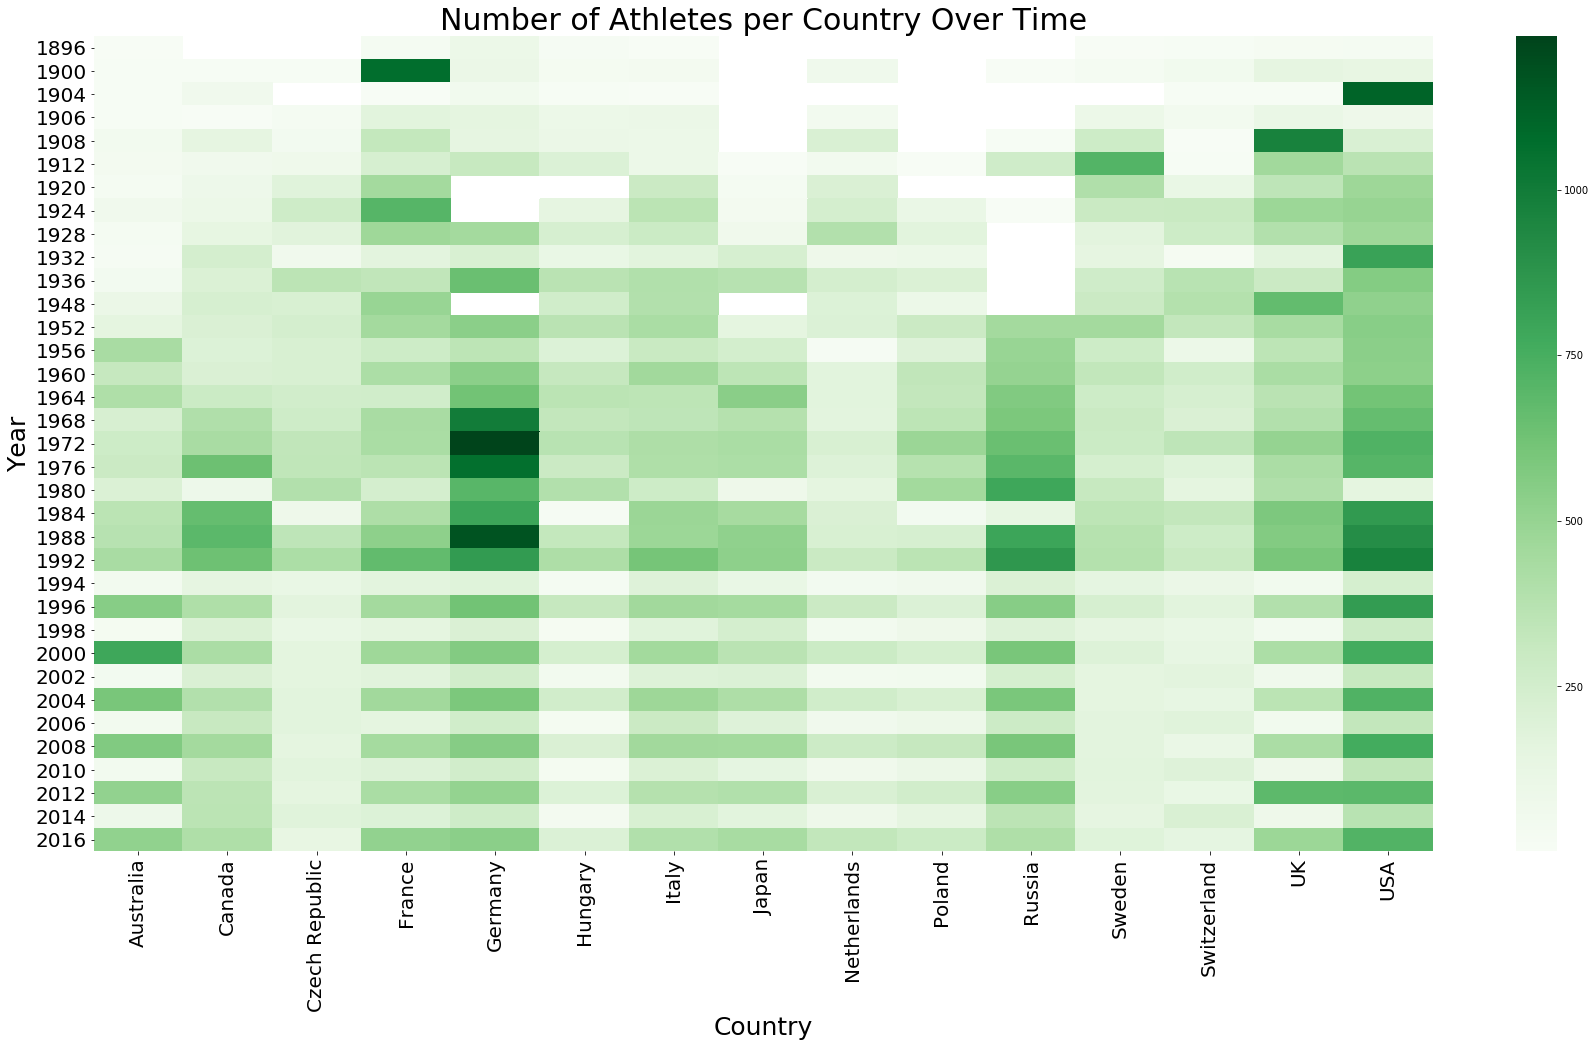

In [135]:
participation_heatmap = top_participants.pivot_table(values='ID',index='Year',columns='region')
plt.figure(figsize=(30,15))
sns.heatmap(participation_heatmap,annot=False,cmap="Greens")
plt.yticks(rotation=0,size=20)
plt.xticks(size=20,rotation=90)
plt.ylabel('Year',size=25)
plt.xlabel('Country',size=25)
plt.title('Number of Athletes per Country Over Time', size=30)
plt.show()

Although we observe a general overall increase in athlete participation within each top country over time, interesting deviations from this trend can be found in the Olympic history for most of these nations. Some notable occurences of these include:
- French participation in the games they hosted in Paris in 1900 was extraordinarily high.
- German participation spiked throughout the later years of the Cold War, showing remarkable recovery from their political and economic demise in World War II, though much of this can be attributed to the efforts of East Germany (considered with Germany for the sake of this heatmap).
- Many countries are absent (represented by white gaps) from the 1980 and 1984 games, for aforementioned political reasons.
- US participation, similar to the French in 1900, was remarkably high during the 1904 Los Angeles games. The same is true of the UK, Sweden, France, and Australia in the 1908 London, 1912 Stokholm, 1924 Paris, and 2000 Sydney games (respectively).
- Following the 1992 separation of summer and winter games, we notice oscillating levels of participation similar to those observed in the point plots above.
- Many high-participating nations such as Australia and Japan did not really join the competition until well after our other countries, waiting until as late as 1956 before sending large numbers of athletes.

## Summary 

As evident throughout much of this section, the Olympic Games have been a highly politicized event throughout history, reflecting many of the political, social, and economic trends experienced internationally, particularly with regards to the relationships between countries. The games have been used to make political statements at many points throughout the past 124 years, with varying levels of success and influence, allowing nations to enact international change via the decisions they make individually or collectively with regards to their participation in the games. This places the Olympic Games not only as a social cornerstone of sports entertainment within our world, but more importantly as a force of international influence and directorship. Continuing forth, the Olympic Games will certainly continue to hold such influence over international relations, but it remains yet to be seen in what way, and how this will shape the future of our world.

In this section we explored the following questions:
- How do we account for countries with multiple NOC codes throughout history?
- Which countries have won the most Olympic medals total?
- Which countries have the highest proportion of athletes winning medals?
- How can we visualize medal data for each country with plotly choropleth maps?
- How has the number of participating countries changed over time?
- How has the number of athletes from our top participating countries changed over time?